In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### **Load Data Set**

In [246]:
data = pd.read_csv("/kaggle/input/companycsv/Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [248]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [249]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


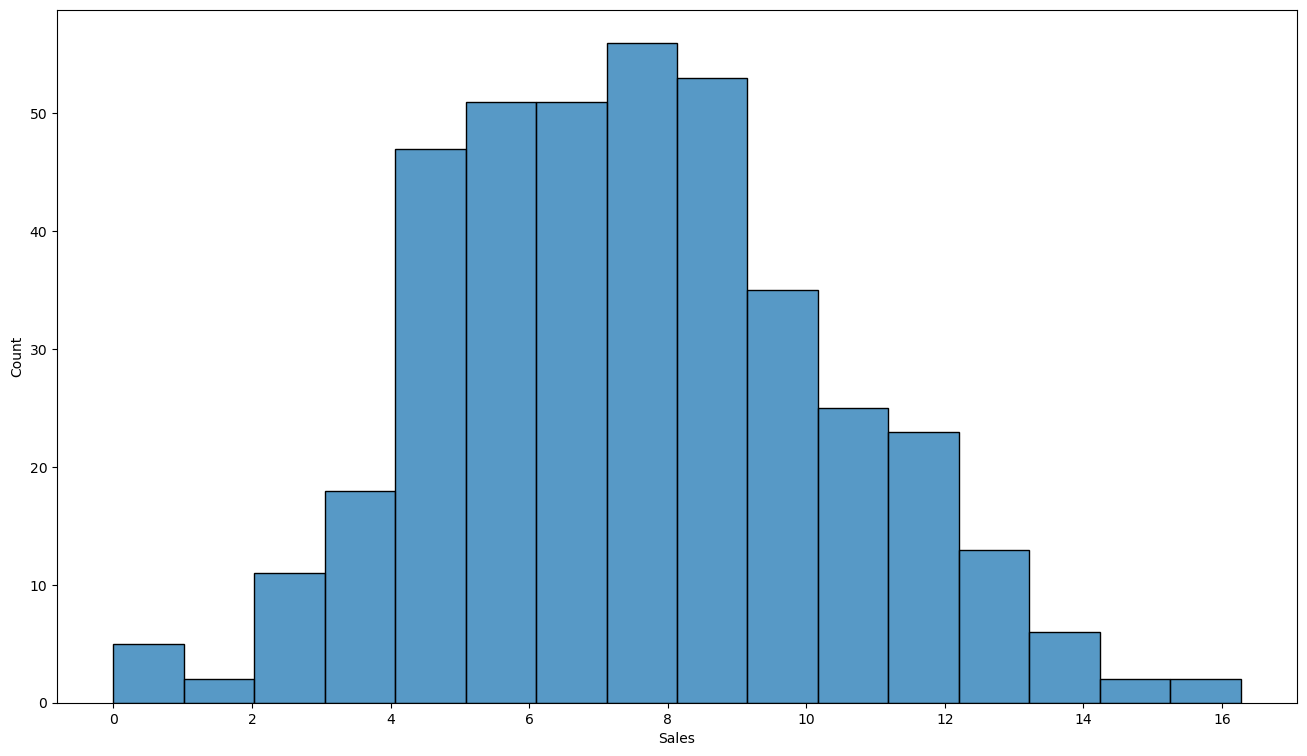

In [250]:
plt.figure(figsize=(16,9))
sns.histplot(data=data['Sales'])
plt.show()

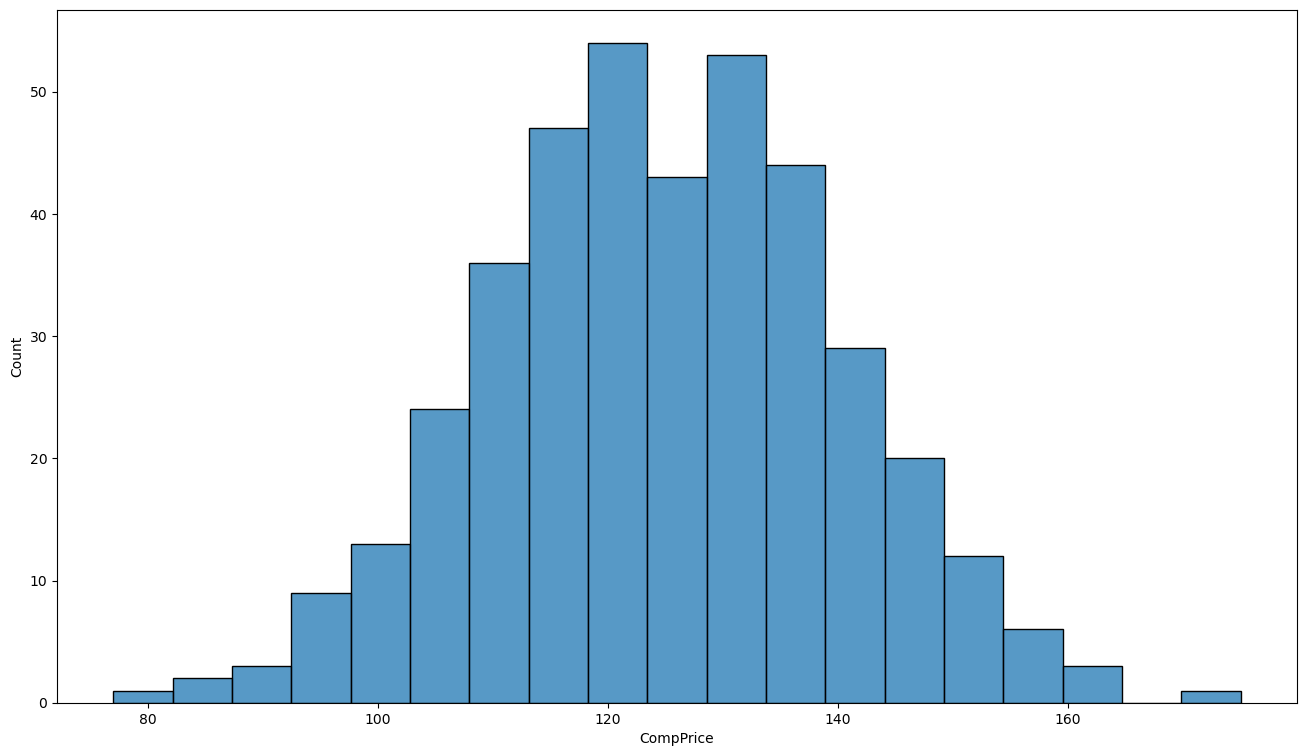

In [251]:
plt.figure(figsize=(16,9))
sns.histplot(data=data['CompPrice'])
plt.show()

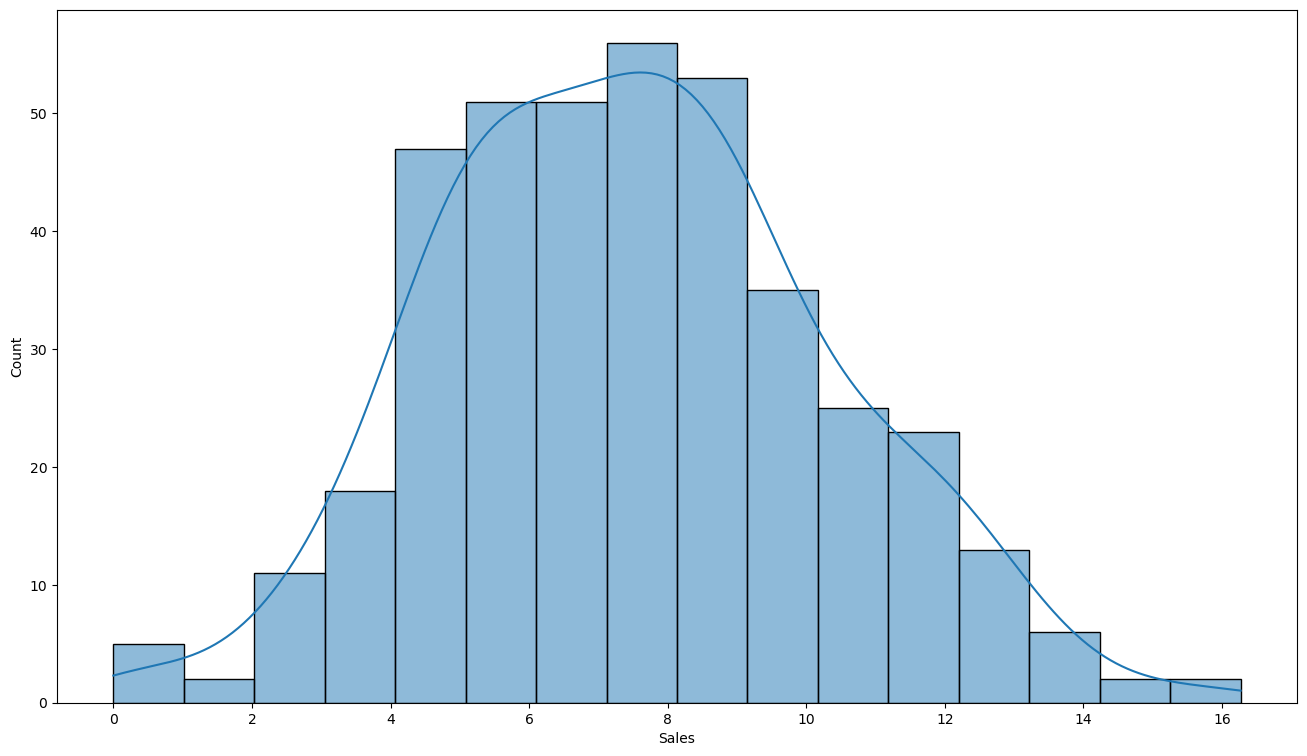

In [252]:
plt.figure(figsize=(16,9))
sns.histplot(data=data['Income'], x=data['Sales'], kde=True)
plt.show()

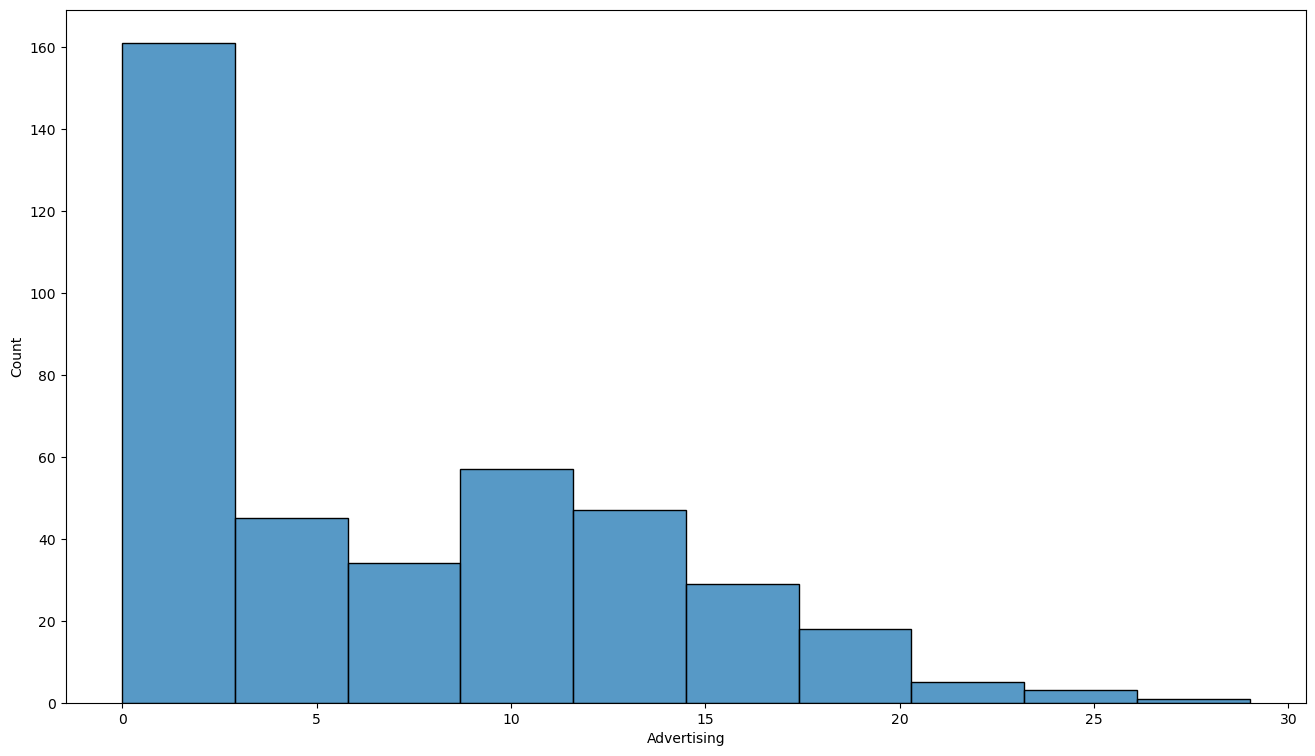

In [253]:
plt.figure(figsize=(16,9))
sns.histplot(data=data['Advertising'])
plt.show()

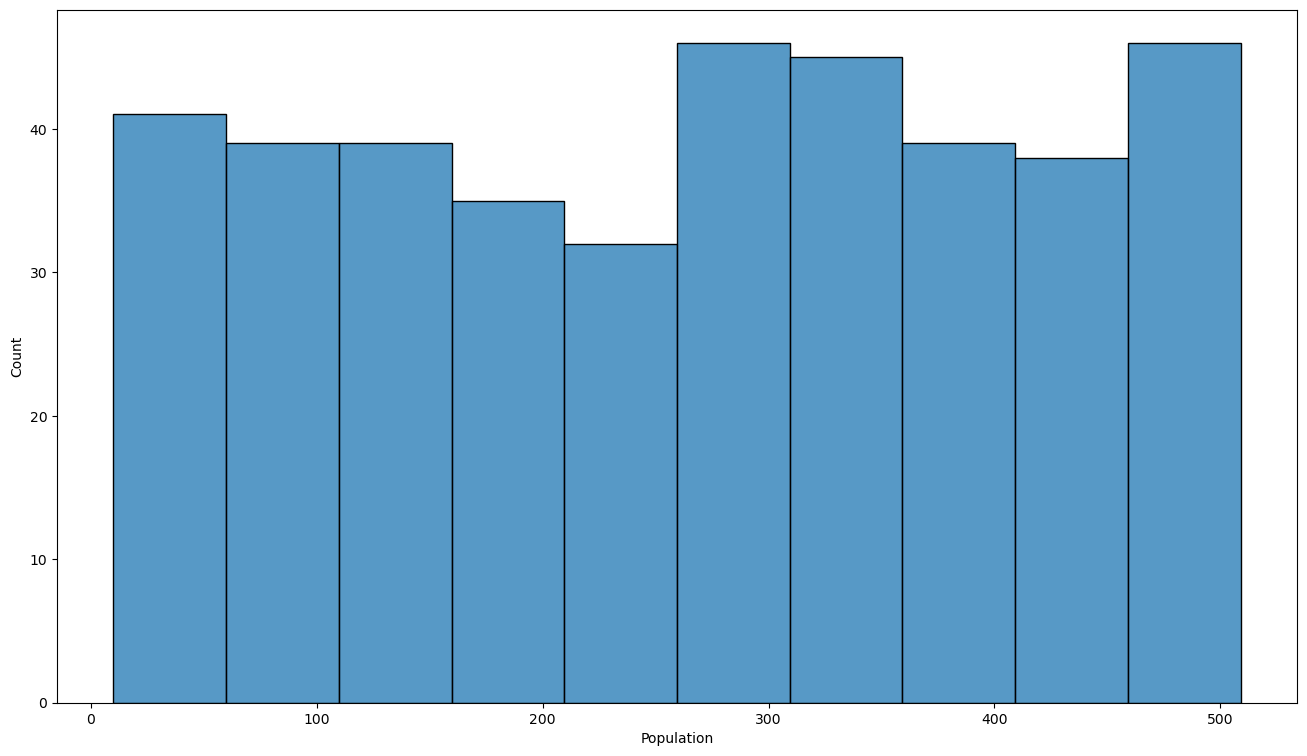

In [254]:
plt.figure(figsize=(16,9))
sns.histplot(data=data['Population'])
plt.show()

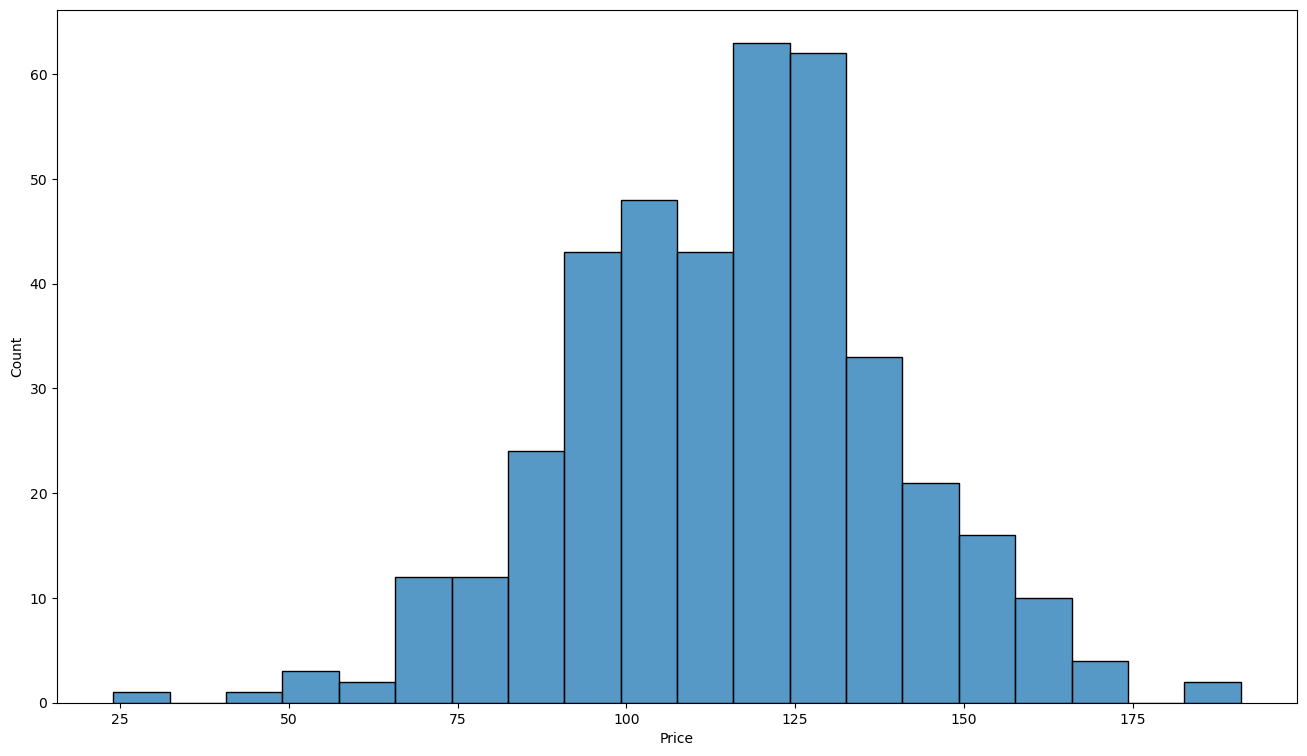

In [255]:
plt.figure(figsize=(16,9))
sns.histplot(data=data['Price'])
plt.show()

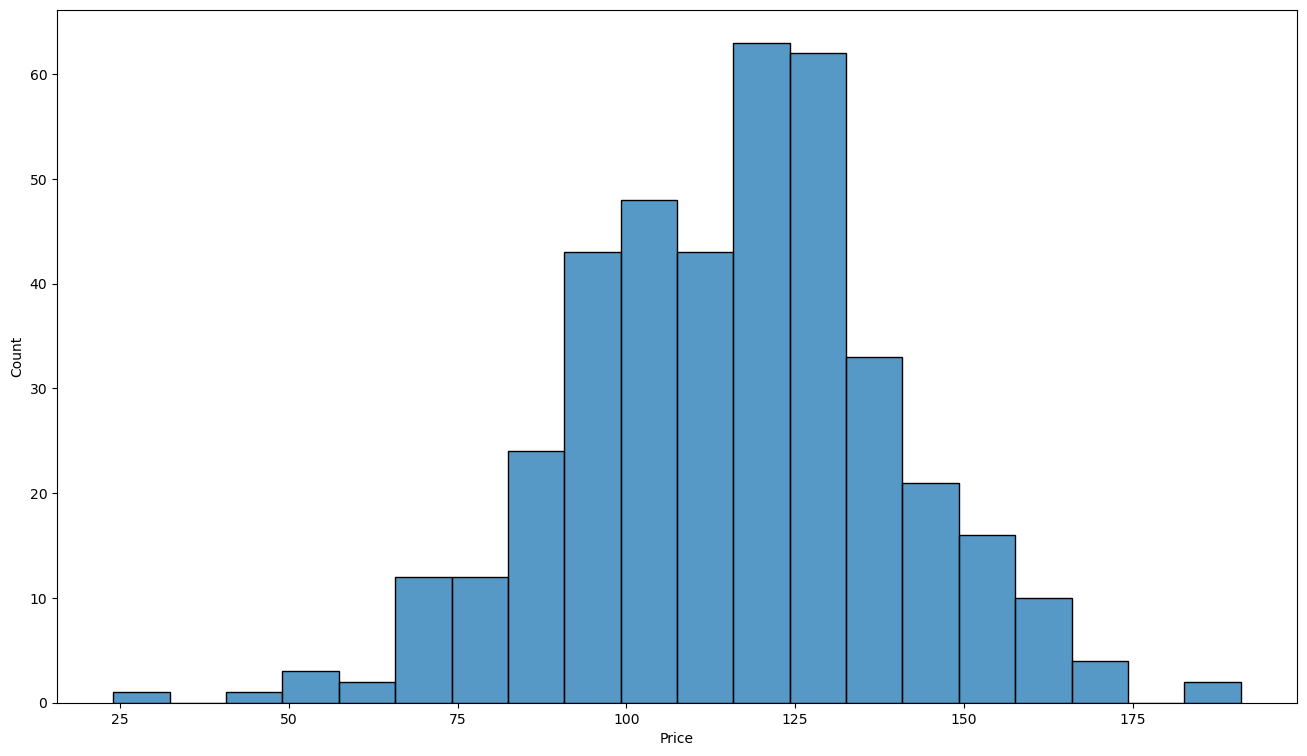

In [256]:
plt.figure(figsize=(16,9))
sns.histplot(data=data['Price'])
plt.show()

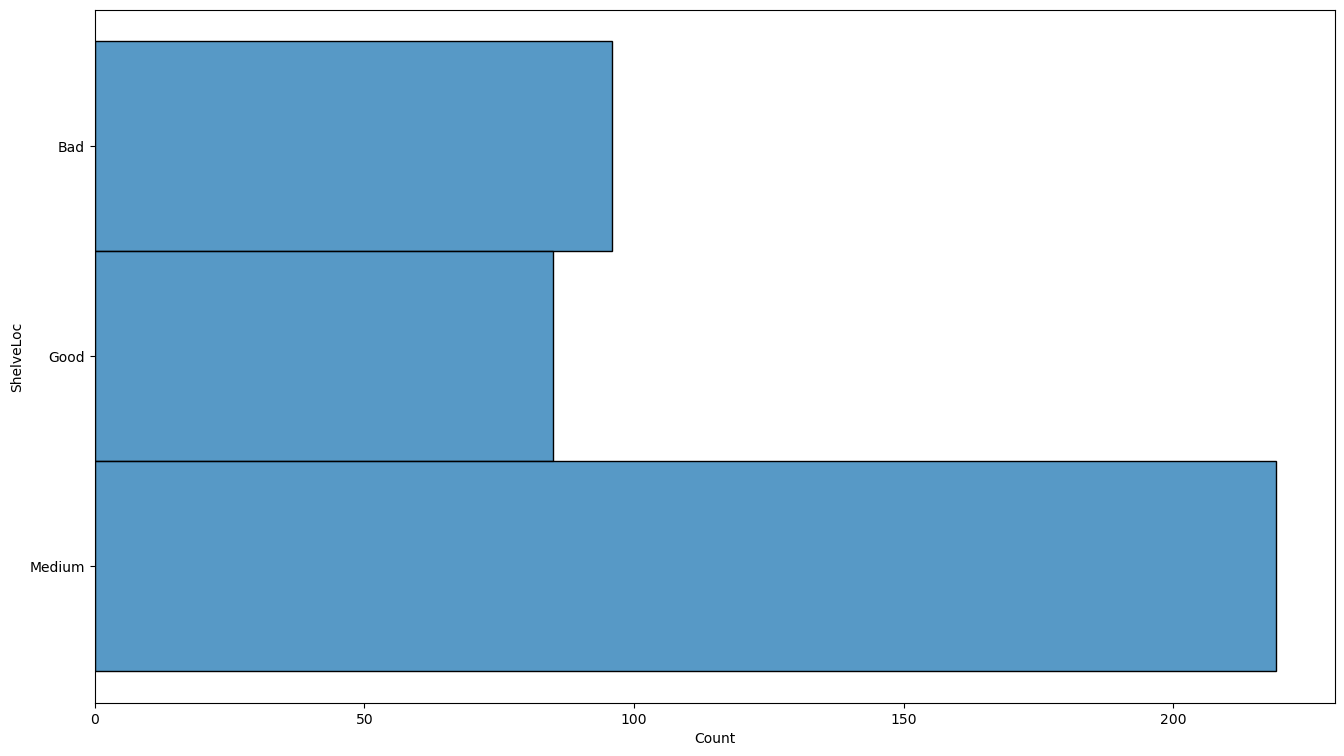

In [257]:
plt.figure(figsize=(16,9))
sns.histplot(data=data, y="ShelveLoc", binwidth=3)
plt.show()

                Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0

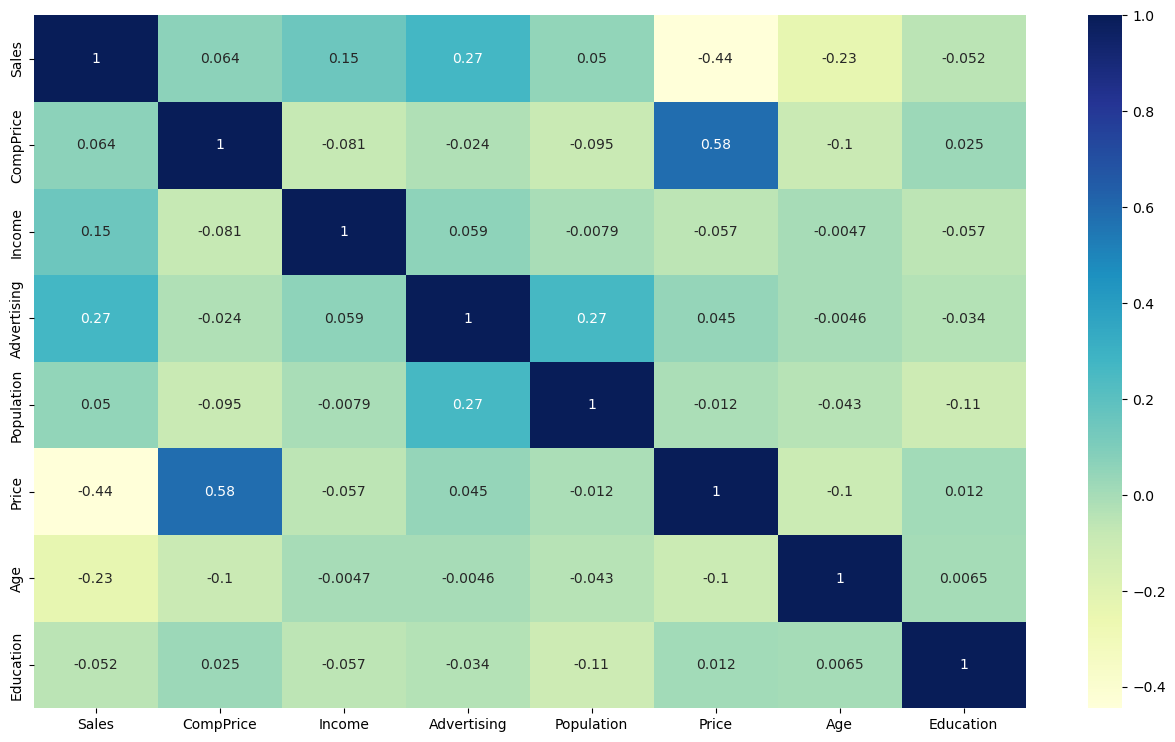

In [258]:
print(data.corr())
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Correlation Info
* **CompPrice** is highly overall correlated with **Price**
* **Advertising** is highly overall correlated with **Population**

#### **Convert the target variable into categorical by defining sales categories**

In [259]:
data["Sales_Category"] = pd.cut(data["Sales"],  [0,5.39,9.32,17], labels=["low", "medium", "high"], right=False)


#### **Drop unnecessary columns**

In [260]:
data = data.drop(["Sales"], axis=1)

In [261]:
data.isnull().sum()

CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
Sales_Category    0
dtype: int64

#### **Encode categorical variables**

In [262]:
le = LabelEncoder()
data["ShelveLoc"] = le.fit_transform(data["ShelveLoc"])
data["Urban"] = le.fit_transform(data["Urban"])
data["US"] = le.fit_transform(data["US"])

In [263]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,medium
4,141,64,3,340,128,0,38,13,1,0,low


#### **Scale numerical variables**

In [264]:
scaler = StandardScaler()
num_cols = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education"]
data[num_cols] = scaler.fit_transform(data[num_cols])

#### **Split the data into training and testing sets**

In [265]:

X = data.drop(["Sales_Category"], axis=1)
y = data["Sales_Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### **Train a random forest model with default hyperparameters**

In [266]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### **Evaluate the model performance on the testing set**

In [267]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.65
Confusion Matrix:
 [[10  0  5]
 [ 0 10 10]
 [ 5  8 32]]


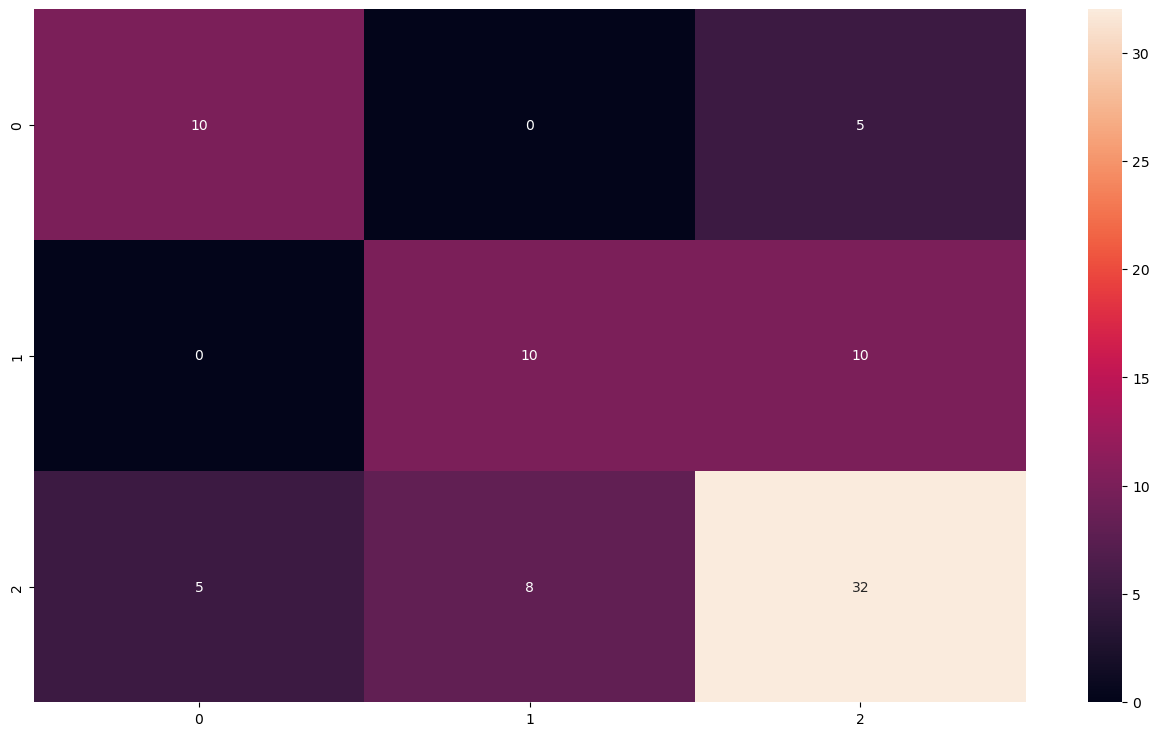

In [268]:
plt.figure(figsize=(16,9))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

#### **Get the feature importances**

In [269]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print(feature_importances)

             Importance
Price          0.209028
ShelveLoc      0.144751
Age            0.120363
CompPrice      0.117405
Population     0.116073
Advertising    0.100303
Income         0.095024
Education      0.064113
US             0.017185
Urban          0.015756


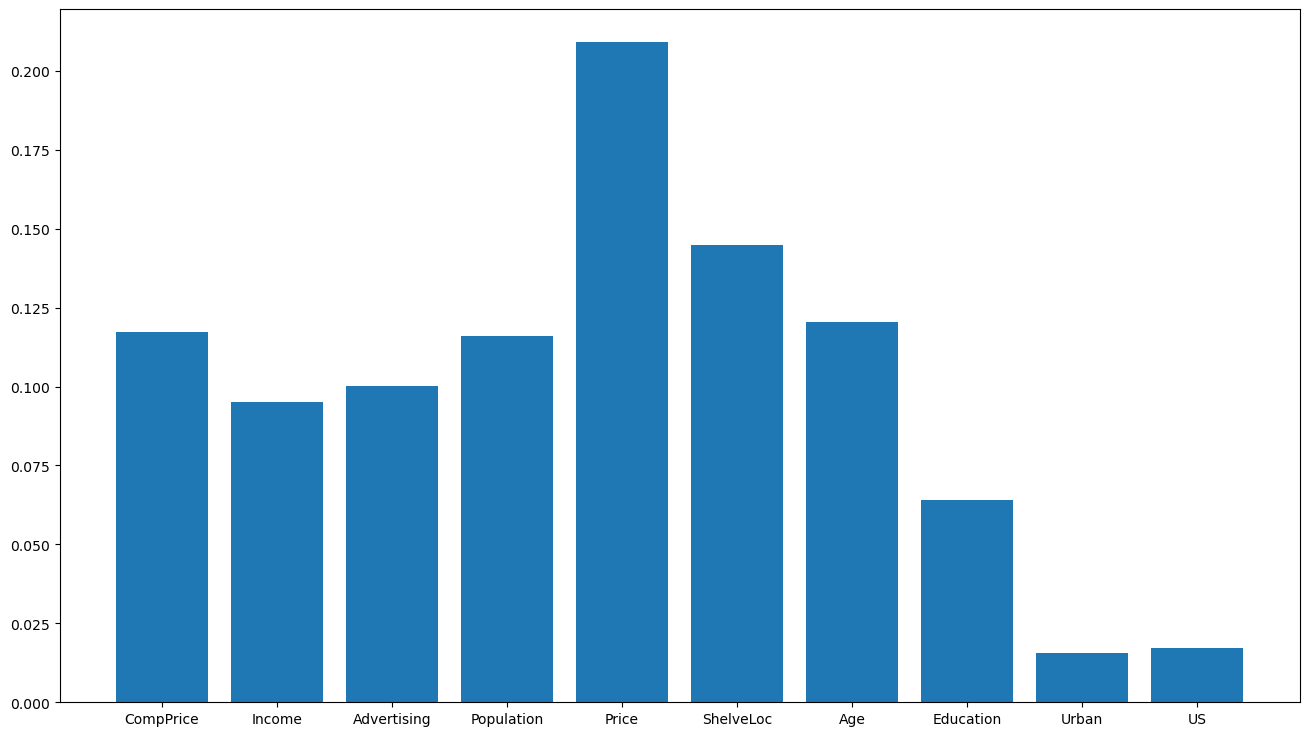

In [270]:
plt.figure(figsize=(16,9))
plt.bar( range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(range(len(model.feature_importances_)), X_train.columns)
plt.show()